# Get Immutable Reference Benchmarks

In [6]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-12-23 16-47-29.json"

unwrapped = False
unit = "ms"

In [7]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [8]:
from util.convert import convert_datasets
import pandas as pd

dataset = convert_datasets(
    raw_data,
    "Raw Storage Latency",
    [("persistent_storage_read", "Storage Read"), ("persistent_storage_write", "Storage Write")],
    [
        "mean",
        "min",
        "max",
        "options.object_size",
        "options.queue_length",
        "options.iterations",
        "options.buffer_size",
        "options.ram_overhead",
        "machine_name",
        "cold_start",
        "repetitions",
    ],
    unwrapped=unwrapped,
)

dataset.head()

,mean,min,max,options.object_size,options.queue_length,options.iterations,options.buffer_size,options.ram_overhead,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id
0,463.2,463,464,0,NaN,NaN,NaN,NaN,esp32c3,0,10,16000,Raw Storage Latency,Storage Read,persistent_storage_read
1,7801.7,7279,12501,16,NaN,NaN,NaN,NaN,esp32c3,0,10,16000,Raw Storage Latency,Storage Read,persistent_storage_read
2,10760.6,10238,15460,32,NaN,NaN,NaN,NaN,esp32c3,0,10,16000,Raw Storage Latency,Storage Read,persistent_storage_read
3,13720.0,13197,18420,48,NaN,NaN,NaN,NaN,esp32c3,0,10,16000,Raw Storage Latency,Storage Read,persistent_storage_read
4,16679.2,16157,21379,64,NaN,NaN,NaN,NaN,esp32c3,0,10,16000,Raw Storage Latency,Storage Read,persistent_storage_read


In [9]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min       28.95000
max    94997.05625
Name: mean, dtype: float64

min        23.39375
max    159296.93750
Name: mean, dtype: float64

<Axes: xlabel='Object size [byte]', ylabel='Latency [ms]'>

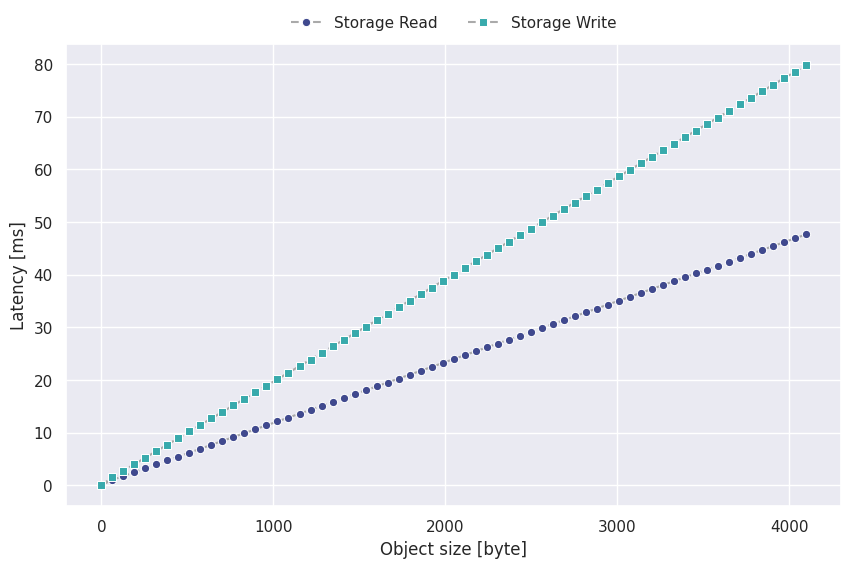

In [ ]:
from util.plot import plot_lines

scale = 64
max_size = 4 * 1024

plot_data = [
    {
        "name": "Storage Read",
        "x": "options.object_size",
        "y": "mean",
        "marker": "o",
        "data": dataset[(dataset["benchmark_id"] == "persistent_storage_read") & (dataset["options.object_size"] <= max_size) & (dataset["options.object_size"] % scale == 0)],
    },
    {
        "name": "Storage Write",
        "x": "options.object_size",
        "y": "mean",
        "marker": "s",
        "data": dataset[(dataset["benchmark_id"] == "persistent_storage_write") & (dataset["options.object_size"] <= max_size) & (dataset["options.object_size"] % scale == 0)],
    }
]

options = {
    "data": plot_data,
    "scale": unit,
    "x_label": f"Object size [byte]",
    "y_label": f"Latency [{unit}]",
}

plot_lines(options)